<a href="https://colab.research.google.com/github/sobiyeo/iExcel/blob/main/NeuralNetwork_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dropout

In [3]:
#Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(f'Train: X={x_train.shape}, y={y_train.shape}')
print(f'Test: X={x_test.shape}, y={y_test.shape}')


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [5]:
import matplotlib.pyplot as plt

{5}


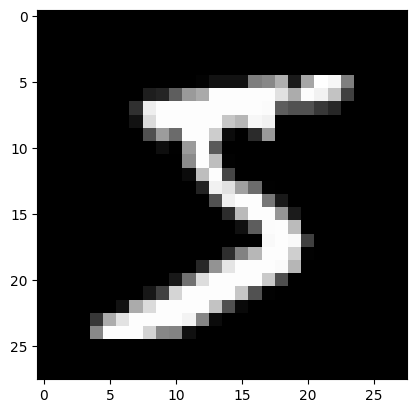

In [6]:
plt.imshow(x_train[0], cmap='gray')
print({y_train[0]})

In [7]:
#to generate a for loop for the printing
'''for i, img in enumerate(x_train[0:4]):
  plt.imshow(img, cmap='gray_r')'''

"for i, img in enumerate(x_train[0:4]):\n  plt.imshow(img, cmap='gray_r')"

{0}


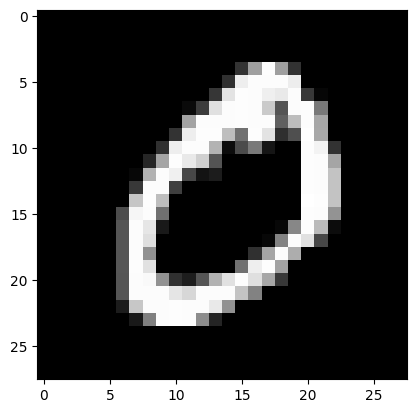

In [8]:
plt.imshow(x_train[1], cmap='gray')
print({y_train[1]})

In [9]:
# reshape data to have a single channel
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))


In [10]:
x_train.shape

(60000, 28, 28, 1)

In [11]:
#Normalise pixel values
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
#This converts the oixel value between 0 and 1

In [12]:
#set input image shape
input_shape = x_train.shape[1:]

In [13]:
from numpy import unique

#set number of classes
n_classes = len(unique(y_train))
#remeber x is the feature and y is the target variable were trying to predict

In [14]:
#define model
model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=input_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

In [19]:
#define loss and optmiser
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
#Fit the model
model.fit(x_train, y_train, epochs=3, batch_size=128, verbose=1)

Epoch 1/3
469/469 [==============================] - 61s 131ms/step - loss: 0.2029 - accuracy: 0.9392
Epoch 2/3
469/469 [==============================] - 61s 130ms/step - loss: 0.1521 - accuracy: 0.9552
Epoch 3/3
469/469 [==============================] - 60s 128ms/step - loss: 0.1214 - accuracy: 0.9643


In [22]:
#evaluate the model
loss, acc = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy:%.3f'%acc)

Accuracy:0.987


7


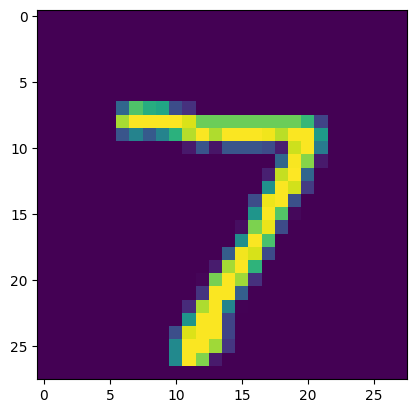

In [24]:
plt.imshow(x_test[0])
print(y_test[0])

In [25]:
#model prediction
import numpy as np


In [27]:
x_test.shape

(10000, 28, 28, 1)

In [30]:
y_pred = model.predict(x_test)

313/313 [==============================] - 4s 11ms/step


In [31]:
y_pred[0]

array([4.5196502e-14, 7.1135969e-10, 1.4592792e-08, 6.4650500e-08,
       6.2840766e-10, 1.2146656e-12, 1.9667590e-16, 9.9999982e-01,
       1.6587610e-11, 1.4057936e-09], dtype=float32)

In [35]:
np.argmax(y_pred[0])

7